In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from keras.layers import Dense ,Input ,Dropout
from keras .models import Model

In [106]:
data=pd.read_csv("mnist_train_small.csv").values
X = data[:, 2:]
y = data[:, 1]

In [107]:
ohe = OneHotEncoder(categories="auto")

In [108]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [129]:
in_layer = Input(shape=[784])
dense_1 = Dense(200, activation="tanh")(in_layer)
dense_2 = Dense(100, activation="tanh")(dense_1)
drop = Dropout(rate=.25)(dense_2)
dense_3 = Dense(50, activation="tanh")(dense_2)
out = Dense(10, activation="softmax")(dense_3)

In [130]:
model = Model(inputs=[in_layer], outputs=[out])

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_41 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [133]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 1s 232us/step - loss: 1.3200 - acc: 0.6106
Epoch 2/10
5360/5360 [==============================] - 0s 57us/step - loss: 0.6228 - acc: 0.8450
Epoch 3/10
5360/5360 [==============================] - 0s 60us/step - loss: 0.4623 - acc: 0.8716
Epoch 4/10
5360/5360 [==============================] - 0s 58us/step - loss: 0.3951 - acc: 0.8894
Epoch 5/10
5360/5360 [==============================] - 0s 56us/step - loss: 0.3476 - acc: 0.9037
Epoch 6/10
5360/5360 [==============================] - 0s 56us/step - loss: 0.3147 - acc: 0.9118
Epoch 7/10
5360/5360 [==============================] - 0s 56us/step - loss: 0.2961 - acc: 0.9157
Epoch 8/10
5360/5360 [==============================] - 0s 59us/step - loss: 0.2885 - acc: 0.9147
Epoch 9/10
5360/5360 [==============================] - 0s 60us/step - loss: 0.2779 - acc: 0.9192: 0s - loss: 0.2736 - acc: 0.9
Epoch 10/10
5360/5360 [==============================] - 0s 59us/step - loss: 0.2747 - 

In [134]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 0s 161us/step


[0.34307229898192665, 0.893560606060606]

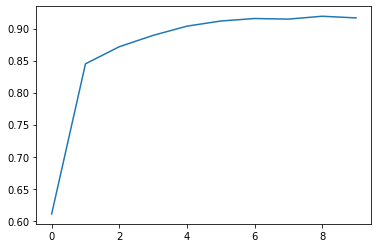

In [135]:
plt.plot(hist.history["acc"])

In [136]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [137]:

m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])


In [138]:

m2.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 291us/step


[0.34307229898192665, 0.893560606060606]

In [83]:
import cv2